# MMF 1927H Workshop in Mathematical Finance
##### Author: Kaiwen Shen

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

In [48]:
import warnings
warnings.simplefilter('ignore',UserWarning)

# Data import

In [49]:
corr=pd.read_excel('WorkshopAssumptions.xlsx', sheet_name='Correlation',header=[0, 1], index_col=[0, 1],skiprows=35)

In [50]:
rf=3.5/100

In [51]:
# collaps columns from multiindex to single index
corr.columns = ['_'.join(col).strip() for col in corr.columns.values]
corr.index = ['_'.join(col).strip() for col in corr.index.values]

In [52]:
corr = corr.where(pd.notnull(corr), corr.T)

In [53]:
ret=pd.read_excel('WorkshopAssumptions.xlsx', sheet_name='Assumptions',header=[0, 1], index_col=[0, 1],skiprows=10)

In [54]:
ret.index = ['_'.join(col).strip() for col in ret.index.values]

In [55]:
ret.columns = [col[0] for col in ret.columns.values]

In [56]:
ret=ret[['Max Return per year','Standard Deviation']]

In [57]:
std = pd.DataFrame(np.diag(ret['Standard Deviation']),index=ret.index,columns=ret.index)

In [58]:
vcov=std.dot(corr).dot(std)

# Data analysis

In [59]:
ret

,Max Return per year,Standard Deviation
Yukon_North,0.276245,0.181740
Yukon_Mid,0.266922,0.175607
Yukon_South,0.228384,0.150253
NU_North,0.276245,0.181740
NU_Mid,0.266922,0.175607
NU_South,0.269167,0.177084
BC_North,0.311160,0.204711
BC_Mid,0.275583,0.181304
BC_South,0.277005,0.182240
AB_North,0.310207,0.204084


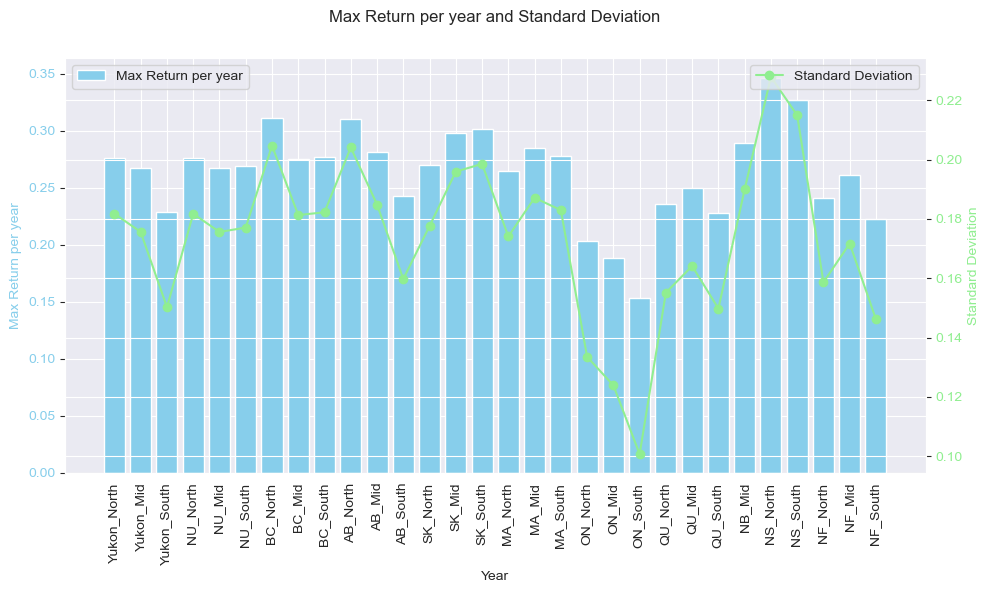

In [60]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Max Return per year
ax1.bar(ret.index, ret['Max Return per year'], color='skyblue', label='Max Return per year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Max Return per year', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(ret.index, rotation=90)

# Creating another y-axis for the line plot
ax2 = ax1.twinx()
ax2.plot(ret.index, ret['Standard Deviation'], color='lightgreen', marker='o', label='Standard Deviation')
ax2.set_ylabel('Standard Deviation', color='lightgreen')
ax2.tick_params(axis='y', labelcolor='lightgreen')

# Adding title and legend
fig.suptitle('Max Return per year and Standard Deviation')
fig.tight_layout()
fig.subplots_adjust(top=0.9)  # Adjust layout to make room for the title

# Adding legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [61]:
ret['Return Rank (largest=1)']=ret['Max Return per year'].rank(ascending=False)
ret['Std Rank (largest=1)']=ret['Standard Deviation'].rank(ascending=False)

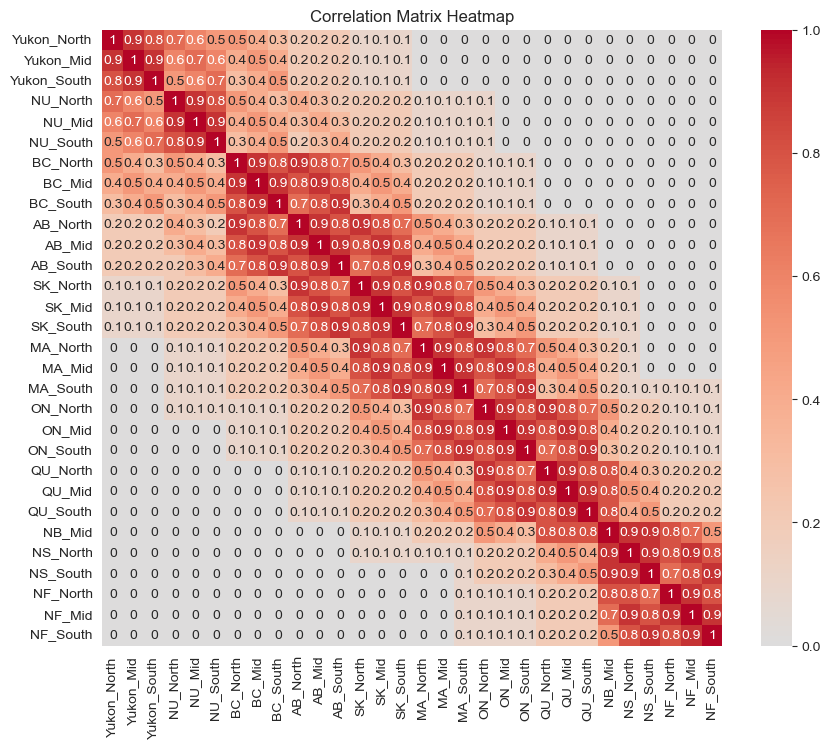

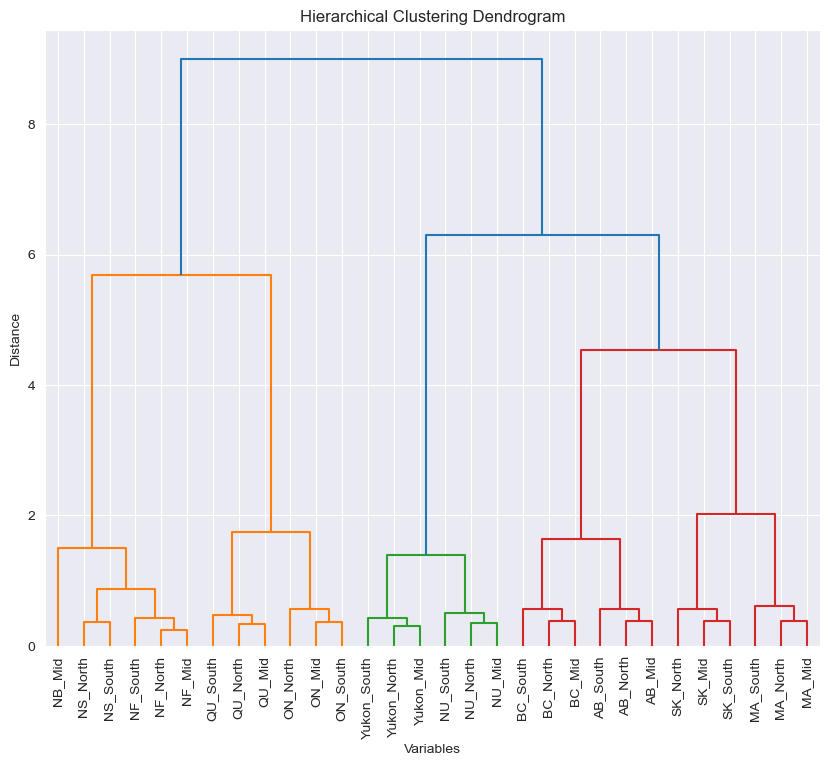

In [62]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Step 4: Perform hierarchical clustering
# Compute the linkage matrix
linkage_matrix = linkage(corr, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 8))
dendrogram(linkage_matrix, labels=corr.columns, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Variables')
plt.ylabel('Distance')
plt.show()

# Portfolio: Equal Weight Comparison

In [63]:
on_ret=ret.loc[[idx for idx in ret.index if 'ON' in idx]]
on_vcov=vcov.loc[[idx for idx in ret.index if 'ON' in idx], [idx for idx in ret.index if 'ON' in idx]]

In [64]:
on_weight=1/len(on_ret)*np.ones(len(on_ret))

In [65]:
portfolio_ret_on=on_weight@on_ret['Max Return per year']# this is the equal weight return in ON 

In [66]:
portfolio_std=np.sqrt(on_weight@on_vcov@on_weight)# this is the equal weight std in ON

In [67]:
print(f'\nON Portfolio Return: {portfolio_ret_on}')
print(f'\nON Portfolio Standard Deviation: {portfolio_std}')
print(f'ON Portfolio Sharpe Ratio: {(portfolio_ret_on-rf)/portfolio_std}')


ON Portfolio Return: 0.18147119488236818

ON Portfolio Standard Deviation: 0.11406531395553608
ON Portfolio Sharpe Ratio: 1.2840993445164606


In [68]:
ca_weight=1/len(ret)*np.ones(len(ret))

In [69]:
portfolio_ret_ca=ca_weight@ret['Max Return per year']# this is the equal weight return in CA

In [70]:
portfolio_std=np.sqrt(ca_weight@vcov@ca_weight)# this is the equal weight std in CA

In [71]:
print(f'\nCA Portfolio Return: {portfolio_ret_ca}')
print(f'\nCA Portfolio Standard Deviation: {portfolio_std}')
print(f'CA Portfolio Sharpe Ratio: {(portfolio_ret_ca-rf)/portfolio_std}')


CA Portfolio Return: 0.26406447525138904

CA Portfolio Standard Deviation: 0.09697773443419189
CA Portfolio Sharpe Ratio: 2.3620316208441627


## Q1, Q2 answer:
To quickly calculate whether expanding the planting area from ON to whole CA, we did an equal weighted portfolio for both, and compared their Sharpe Ratio. ON yield 1.284 sharpe whereas CA yield 2.362 sharpe ratio. Fundamentally, as long as we have None perfect correlation asset in addition to the existing asset, we will always get a sharpe ratio increase. But in reality companies who are actually planting trees may have lots of other issues to think about, for example, regulation constraints, risk oversight, company location from the planting, etc. 

# Annealer optimization

In [72]:
ret.index==corr.columns# assert entry correct

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [73]:
np.random.seed(0)

In [74]:
# Parameters
NSteps = 100000
NumAssets = len(ret)  
InitialdW = 0.10
FinaldW = 0.0001
ExpReturn = ret['Max Return per year'] 
ExpRisk = ret['Standard Deviation']  
ExpCorr = corr  
CashReturn = rf 

# Temperature decay parameter
TSteps = np.arange(1, NSteps + 1)
lambda_ = - np.log(FinaldW / InitialdW) / NSteps

# Temperature
sigma = InitialdW * np.exp(-lambda_ * (TSteps - 1))

# Generating the random walk
dw = np.zeros((NumAssets, NSteps))
dw[:, 1:] = sigma[:-1] * np.random.randn(NumAssets, NSteps - 1)

# Annealer Algo Starts Here
PortReturnBASE = np.full(NSteps, np.nan)
PortRiskBASE = np.full(NSteps, np.nan)
PortSharpeBASE = np.full(NSteps, np.nan)
w = np.full((NumAssets, NSteps), np.nan)

# Initial Conditions
w0 = (1 / NumAssets) * np.ones(NumAssets)
wChampion = w0
MaxSharpTest = 0

# Annealer Algo
for i in range(NSteps):
    # Challenger
    wChallenger = np.maximum(wChampion + dw[:, i], 0)
    wChallenger /= np.sum(wChallenger)  # non-negative and sum to one

    # Calculate the Key Statistics
    PortReturnBASE[i] = np.dot(ExpReturn, wChallenger)
    PortRiskBASE[i] = np.sqrt(np.dot(np.dot((ExpRisk * wChallenger).T, ExpCorr), (ExpRisk * wChallenger)))
    PortSharpeBASE[i] = (PortReturnBASE[i] - CashReturn) / PortRiskBASE[i]

    # Test of the Champion
    if PortSharpeBASE[i] > MaxSharpTest:
        MaxSharpTest = PortSharpeBASE[i]
        wChampion = wChallenger

    # Record the weight explored for later
    w[:, i] = wChallenger

# Identify the maximum Sharpe Portfolio
IMaxSharpe = np.argmax(PortSharpeBASE)
wMaxSharpeBASE = w[:, IMaxSharpe]

MaxSharpeBASE = PortSharpeBASE[IMaxSharpe]

print("MaxSharpeBASE =", MaxSharpeBASE)

MaxSharpeBASE = 2.569134107837827


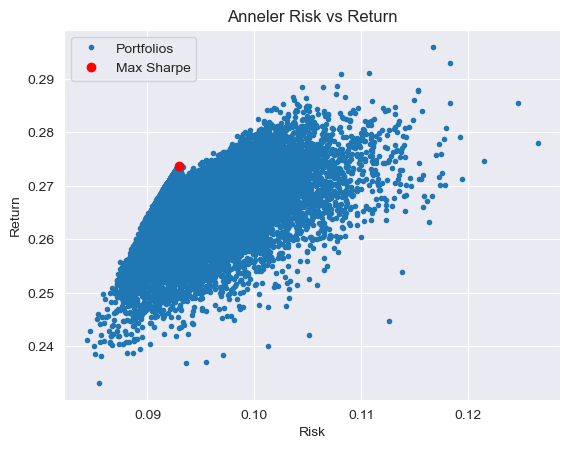

In [75]:
plt.figure()
plt.plot(PortRiskBASE, PortReturnBASE, '.', label='Portfolios')
plt.plot(PortRiskBASE[IMaxSharpe], PortReturnBASE[IMaxSharpe], 'ro', label='Max Sharpe')
plt.title('Anneler Risk vs Return')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.grid(True)
plt.legend()
plt.show()

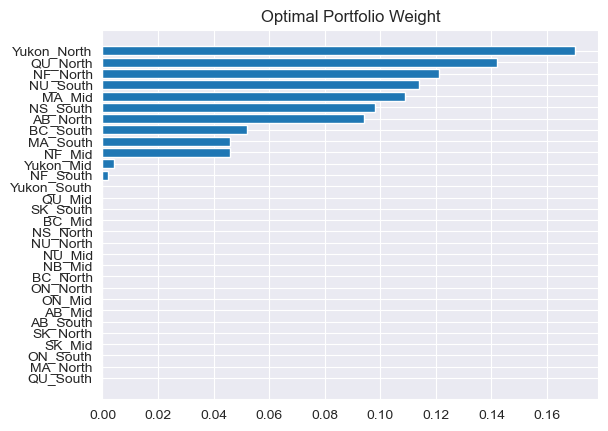

In [76]:
portfolio_weight = pd.DataFrame(wMaxSharpeBASE,index=ret.index,columns=['Portfolio Weight',]).sort_values('Portfolio Weight').round(3)

plt.barh(y=portfolio_weight.index,width=portfolio_weight['Portfolio Weight'])
plt.title('Optimal Portfolio Weight')
plt.show()

In [78]:
top_3_holdings=list(portfolio_weight.sort_values('Portfolio Weight',ascending=False).index[:3])

In [79]:
top_3_holdings

['Yukon_North', 'QU_North', 'NF_North']

## Q3 Answer
Top 3: ['Yukon_North', 'QU_North', 'NF_North']

Sanity Check:

the top 3 holdings have as small correlation as possible, QU North and NF_North have 0.2 and all others 0. 

fun observation: The rank for all area is the same in Return and std, which means a perfect correlation between return and standard deviation (larger the std, larger the return, one to one). To maximize sharpe, we would choose somewhere in the middle (i.e. middle rank return and middle rank standard deviation) with correlation as small as possible. which is also true for the result, where I'm getting rank [12, 24, 23] respectively. 


In [84]:
np.corrcoef(ret['Max Return per year'],ret['Standard Deviation'])

array([[1., 1.],
       [1., 1.]])

In [80]:
corr.loc[top_3_holdings,top_3_holdings]

,Yukon_North,QU_North,NF_North
Yukon_North,1.0,0.0,0.0
QU_North,0.0,1.0,0.2
NF_North,0.0,0.2,1.0


In [82]:
ret.loc[top_3_holdings,:]

,Max Return per year,Standard Deviation,Return Rank (largest=1),Std Rank (largest=1)
Yukon_North,0.276245,0.181740,12.5,12.5
QU_North,0.235834,0.155154,24.0,24.0
NF_North,0.241151,0.158652,23.0,23.0
